In [1]:
 %pip install "dask[complete]"

     |████████████████████████████████| 112kB 11.0MB/s 
     |████████████████████████████████| 675kB 15.9MB/s 
ERROR: distributed 2021.3.0 has requirement cloudpickle>=1.5.0, but you'll have cloudpickle 1.3.0 which is incompatible.
ERROR: distributed 2021.3.0 has requirement dask>=2021.03.0, but you'll have dask 2.12.0 which is incompatible.
  Found existing installation: distributed 1.25.3
    Uninstalling distributed-1.25.3:
      Successfully uninstalled distributed-1.25.3


In [2]:
%pip install dask --upgrade

     |████████████████████████████████| 931kB 12.0MB/s 
ERROR: distributed 2021.3.0 has requirement cloudpickle>=1.5.0, but you'll have cloudpickle 1.3.0 which is incompatible.
  Found existing installation: dask 2.12.0
    Uninstalling dask-2.12.0:
      Successfully uninstalled dask-2.12.0


In [3]:
%pip install cloudpickle --upgrade

  Found existing installation: cloudpickle 1.3.0
    Uninstalling cloudpickle-1.3.0:
      Successfully uninstalled cloudpickle-1.3.0


In [60]:
import dask
import dask.array as da
import dask.dataframe as dd
import dask.delayed as delayed
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [61]:
dask_sch = {
    'THREADS': 'threads',           # planificator pe fire de executie
    'PROCESSES': 'processes',       # planificator pe procese
    'SYNCRONOUS': 'synchronous'     # planificator sincron (rulare sincron)
}
dask_scheduler_selected = 'THREADS'
dask.config.set(scheduler=dask_sch[dask_scheduler_selected])

In [62]:
scheduler_types = {
    'MULTIPROCESSING': 'multiprocessing',
    'PROCESSES': 'processes',
    'SINGLE-THREADED': 'single-threaded',
    'SYNC': 'sync',
    'SYNCHRONOUS': 'synchronous',
    'THREADING': 'threading',
    'THREADS': 'threads'
}

In [63]:
%time bitcoin = dd.read_csv('BitcoinUSD.csv')

CPU times: user 13.7 ms, sys: 756 µs, total: 14.5 ms
Wall time: 17.6 ms


In [34]:
for key, value in scheduler_types.items():
    print(f'{key} run:')
    %time bitcoin.compute(scheduler=value)
    print('----------------------------')
print('Without scheduler:')
%time bitcoin.compute()

MULTIPROCESSING run:
CPU times: user 102 ms, sys: 112 ms, total: 215 ms
Wall time: 2.83 s
----------------------------
PROCESSES run:
CPU times: user 82.2 ms, sys: 111 ms, total: 193 ms
Wall time: 2.75 s
----------------------------
SINGLE-THREADED run:
CPU times: user 933 ms, sys: 32.2 ms, total: 966 ms
Wall time: 968 ms
----------------------------
SYNC run:
CPU times: user 911 ms, sys: 31.6 ms, total: 942 ms
Wall time: 952 ms
----------------------------
SYNCHRONOUS run:
CPU times: user 941 ms, sys: 35.6 ms, total: 977 ms
Wall time: 984 ms
----------------------------
THREADING run:
CPU times: user 1.12 s, sys: 63.4 ms, total: 1.18 s
Wall time: 871 ms
----------------------------
THREADS run:
CPU times: user 1.13 s, sys: 61.9 ms, total: 1.19 s
Wall time: 874 ms
----------------------------
Without scheduler:
CPU times: user 1.13 s, sys: 56.6 ms, total: 1.18 s
Wall time: 872 ms


,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
309098,1420201920,315.33,315.33,315.33,315.33,0.362500,114.307125,315.33
309099,1420201980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
309100,1420202040,315.27,315.27,315.27,315.27,0.160973,50.749999,315.27
309101,1420202100,315.27,315.27,315.27,315.27,0.581200,183.234924,315.27


OLD PROJECT:
CPU times: user 261 ms, sys: 63.2 ms, total: 324 ms
Wall time: 357 ms

In [35]:
bitcoin.npartitions

2

In [36]:
bitcoin.map_partitions(len).compute()

0    1272302
1     563832
dtype: int64

In [37]:
bitcoin.head(20)


,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1325318220,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1325318280,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1325318340,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1325318400,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1325318460,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
type(bitcoin)

dask.dataframe.core.DataFrame

In [64]:
bitcoin['time']=dd.to_datetime(bitcoin.Timestamp,unit='s')

In [40]:
bitcoin.tail()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,time
598634,1437962400,293.73,293.73,293.73,293.73,4.067700,1194.805521,293.730000,2015-07-27 02:00:00
598635,1437962460,293.73,293.76,293.73,293.76,4.329772,1271.909178,293.758904,2015-07-27 02:01:00
598636,1437962520,293.75,293.75,293.70,293.70,45.682187,13418.248303,293.730428,2015-07-27 02:02:00
598637,1437962580,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-07-27 02:03:00
598638,14379626,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-06-16 10:20:26


In [65]:
dtype = {'Close':'float64','Volume_(BTC)':'float64','Volume_(Currency)':'float64','Weighted_Price':'float64'}

In [42]:
bitcoin.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,time
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39,2011-12-31 07:52:00
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-12-31 07:53:00
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-12-31 07:54:00
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-12-31 07:55:00
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-12-31 07:56:00


In [43]:
type(bitcoin)

dask.dataframe.core.DataFrame

In [44]:
bit_transf = bitcoin.dropna()

In [47]:
dtype = {'Close':'float64','Volume_(BTC)':'float64','Volume_(Currency)':'float64','Weighted_Price':'float64'}

In [48]:
for key, value in scheduler_types.items():
    print(f'{key} run:')
    %time bit_transf.compute(scheduler=value)
    print('----------------------------')
print('Without scheduler:')
%time bit_transf.compute()

MULTIPROCESSING run:
CPU times: user 222 ms, sys: 169 ms, total: 390 ms
Wall time: 3.21 s
----------------------------
PROCESSES run:
CPU times: user 237 ms, sys: 164 ms, total: 400 ms
Wall time: 3.16 s
----------------------------
SINGLE-THREADED run:
CPU times: user 1.37 s, sys: 60.2 ms, total: 1.43 s
Wall time: 1.44 s
----------------------------
SYNC run:
CPU times: user 1.4 s, sys: 43 ms, total: 1.45 s
Wall time: 1.46 s
----------------------------
SYNCHRONOUS run:
CPU times: user 1.38 s, sys: 49.9 ms, total: 1.43 s
Wall time: 1.44 s
----------------------------
THREADING run:
CPU times: user 1.98 s, sys: 104 ms, total: 2.08 s
Wall time: 1.19 s
----------------------------
THREADS run:
CPU times: user 1.97 s, sys: 117 ms, total: 2.08 s
Wall time: 1.23 s
----------------------------
Without scheduler:
CPU times: user 2 s, sys: 115 ms, total: 2.11 s
Wall time: 1.21 s


,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,time
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000,2011-12-31 07:52:00
478,1325346600,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000,2011-12-31 15:50:00
547,1325350740,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411,2011-12-31 16:59:00
548,1325350800,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000,2011-12-31 17:00:00
1224,1325391360,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000,2012-01-01 04:16:00
...,...,...,...,...,...,...,...,...,...
853507,1453254780,375.85,375.85,375.85,375.85,0.430200,161.690670,375.850000,2016-01-20 01:53:00
853509,1453254900,375.84,375.84,375.84,375.84,0.239000,89.825760,375.840000,2016-01-20 01:55:00
853522,1453255680,375.74,375.76,375.74,375.76,4.000000,1503.000098,375.750025,2016-01-20 02:08:00
853523,1453255740,375.76,375.76,375.76,375.76,4.000000,1503.040000,375.760000,2016-01-20 02:09:00


In [49]:
type(bit_transf)

dask.dataframe.core.DataFrame

In [50]:
bit_transf.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,time
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000,2011-12-31 07:52:00
478,1325346600,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000,2011-12-31 15:50:00
547,1325350740,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411,2011-12-31 16:59:00
548,1325350800,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000,2011-12-31 17:00:00
1224,1325391360,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000,2012-01-01 04:16:00


CPU times: user 881 µs, sys: 11.2 ms, total: 12.1 ms
Wall time: 92.8 ms


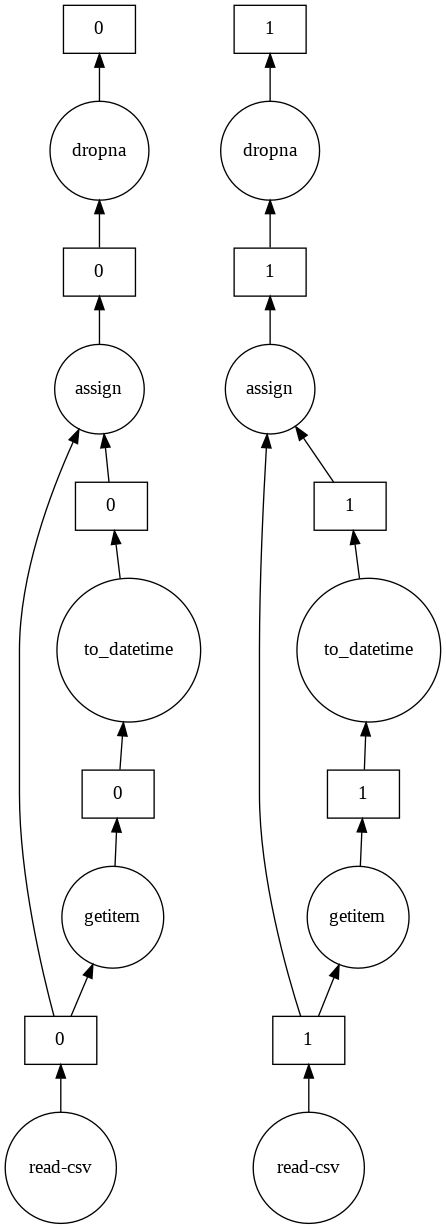

In [51]:
%time bit_transf.visualize()
bit_transf.visualize()

# Stergerea timestamp

In [52]:
%time bitcoin_new = bit_transf.drop(['Timestamp'],axis=1)

CPU times: user 8.33 ms, sys: 0 ns, total: 8.33 ms
Wall time: 8.36 ms


In [53]:
bitcoin_new.head(-50)

/usr/local/lib/python3.7/dist-packages/dask/dataframe/core.py:6383: UserWarning: Insufficient elements for `head`. -50 elements requested, only 519603 elements available. Try passing larger `npartitions` to `head`.
  warnings.warn(msg.format(n, len(r)))


,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,time
0,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000,2011-12-31 07:52:00
478,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000,2011-12-31 15:50:00
547,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411,2011-12-31 16:59:00
548,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000,2011-12-31 17:00:00
1224,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000,2012-01-01 04:16:00
...,...,...,...,...,...,...,...,...
1272244,634.25,639.39,634.11,639.05,9.428325,5979.709327,634.228154,2014-06-01 19:56:00
1272245,636.14,637.12,634.11,637.12,11.962806,7592.122715,634.643984,2014-06-01 19:57:00
1272246,637.26,638.88,637.26,638.87,1.930390,1232.304103,638.370578,2014-06-01 19:58:00
1272247,635.66,638.85,634.87,638.85,0.593840,377.227186,635.233870,2014-06-01 19:59:00


# Stergere Nan


In [58]:
%time clean_bitcoin = bitcoin_new.dropna()

CPU times: user 9.73 ms, sys: 0 ns, total: 9.73 ms
Wall time: 12.8 ms


In [59]:
for key, value in scheduler_types.items():
    print(f'{key} run:')
    %time clean_bitcoin.compute(scheduler=value)
    print('----------------------------')
print('Without scheduler:')
%time clean_bitcoin.compute()

MULTIPROCESSING run:
CPU times: user 214 ms, sys: 183 ms, total: 398 ms
Wall time: 3.45 s
----------------------------
PROCESSES run:
CPU times: user 280 ms, sys: 182 ms, total: 462 ms
Wall time: 3.43 s
----------------------------
SINGLE-THREADED run:
CPU times: user 1.62 s, sys: 92.8 ms, total: 1.71 s
Wall time: 1.74 s
----------------------------
SYNC run:
CPU times: user 1.6 s, sys: 91.9 ms, total: 1.69 s
Wall time: 1.71 s
----------------------------
SYNCHRONOUS run:
CPU times: user 1.6 s, sys: 90.3 ms, total: 1.69 s
Wall time: 1.71 s
----------------------------
THREADING run:
CPU times: user 2.34 s, sys: 162 ms, total: 2.5 s
Wall time: 1.38 s
----------------------------
THREADS run:
CPU times: user 2.33 s, sys: 219 ms, total: 2.55 s
Wall time: 1.42 s
----------------------------
Without scheduler:
CPU times: user 2.36 s, sys: 214 ms, total: 2.57 s
Wall time: 1.44 s


,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,time
0,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000,2011-12-31 07:52:00
478,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000,2011-12-31 15:50:00
547,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411,2011-12-31 16:59:00
548,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000,2011-12-31 17:00:00
1224,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000,2012-01-01 04:16:00
...,...,...,...,...,...,...,...,...
1044059,547.88,548.00,547.88,548.00,5.000000,2739.984365,547.996873,2016-05-31 09:45:00
1044060,548.00,548.00,548.00,548.00,0.500000,274.000000,548.000000,2016-05-31 09:46:00
1044061,546.78,546.78,546.22,546.22,52.178292,28512.632603,546.446260,2016-05-31 09:47:00
1044062,546.30,547.50,546.30,547.50,7.539040,4126.400452,547.337682,2016-05-31 09:48:00


In [55]:
clean_bitcoin.head(-20)

/usr/local/lib/python3.7/dist-packages/dask/dataframe/core.py:6383: UserWarning: Insufficient elements for `head`. -20 elements requested, only 519633 elements available. Try passing larger `npartitions` to `head`.
  warnings.warn(msg.format(n, len(r)))


,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,time
0,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000,2011-12-31 07:52:00
478,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000,2011-12-31 15:50:00
547,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411,2011-12-31 16:59:00
548,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000,2011-12-31 17:00:00
1224,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000,2012-01-01 04:16:00
...,...,...,...,...,...,...,...,...
1272275,644.03,645.00,643.02,645.00,1.079979,696.042697,644.496564,2014-06-01 20:27:00
1272276,645.00,645.00,645.00,645.00,0.180200,116.229000,645.000000,2014-06-01 20:28:00
1272277,643.02,646.00,643.02,645.73,21.075607,13584.285353,644.550142,2014-06-01 20:29:00
1272278,645.25,645.98,643.02,645.98,0.057740,37.256623,645.246052,2014-06-01 20:30:00


# Index coloana time

In [56]:
%time clean_bit = clean_bitcoin.set_index('time')

CPU times: user 2.39 s, sys: 148 ms, total: 2.53 s
Wall time: 1.45 s


In [57]:
clean_bit.head(10)

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
time,,,,,,,
2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
2011-12-31 15:50:00,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000
2011-12-31 16:59:00,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411
2011-12-31 17:00:00,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000
2012-01-01 04:16:00,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000
2012-01-01 15:28:00,4.84,4.84,4.84,4.84,10.000000,48.400000,4.840000
2012-01-01 22:45:00,5.00,5.00,5.00,5.00,10.100000,50.500000,5.000000
2012-01-02 20:04:00,5.00,5.00,5.00,5.00,19.048000,95.240000,5.000000
2012-01-03 11:45:00,5.32,5.32,5.32,5.32,2.419173,12.870000,5.320000


# Impartire date - Daily

In [26]:
%time clean_bitcoin_daily = clean_bit.resample('D').mean()

CPU times: user 16.8 ms, sys: 3.04 ms, total: 19.8 ms
Wall time: 31 ms


In [28]:
clean_bitcoin_daily.head(10,npartitions=2)

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
time,,,,,,,
2011-12-31,4.465000,4.482500,4.465000,4.482500,23.829470,106.330084,4.471603
2012-01-01,4.806667,4.806667,4.806667,4.806667,7.200667,35.259720,4.806667
2012-01-02,5.000000,5.000000,5.000000,5.000000,19.048000,95.240000,5.000000
2012-01-03,5.252500,5.252500,5.252500,5.252500,11.004660,58.100651,5.252500
2012-01-04,5.200000,5.223333,5.200000,5.223333,11.914807,63.119577,5.208159
2012-01-05,6.281429,6.286190,6.281429,6.286190,4.514373,27.987370,6.284127
2012-01-06,6.435000,6.445000,6.435000,6.445000,2.420196,15.914659,6.438999
2012-01-07,6.800000,6.800000,6.800000,6.800000,0.295858,2.011834,6.800000
2012-01-08,6.950000,6.950000,6.950000,6.950000,2.500000,17.300000,6.950000
